In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = clinical_trial_df.merge(drug_data_df, on='Mouse ID', how='left')

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_sr = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_response_df = tumor_response_sr.to_frame().reset_index()
# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_std_sr = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_std_df = tumor_std_sr.to_frame().reset_index()
# Preview DataFrame
tumor_std_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_rformat_df = tumor_response_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_response_rformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


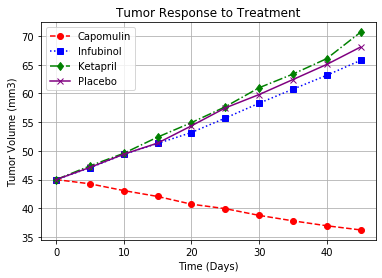

In [41]:
# Generate the Plot (with Error Bars)
x_axis = list(tumor_response_rformat_df.index)

Capomulin, = plt.plot(x_axis, tumor_response_rformat_df[['Capomulin']], 
                      color="red", label="Capomulin", 
                      marker='o', linestyle='dashed' )
Infubinol, = plt.plot(x_axis, tumor_response_rformat_df[['Infubinol']], 
                      color="blue", label="Infubinol", 
                      marker='s', linestyle='dotted' )
Ketapril, = plt.plot(x_axis, tumor_response_rformat_df[['Ketapril']], 
                     color="green", label="Ketapril", 
                     marker='d', linestyle='dashdot' )
Placebo, = plt.plot(x_axis, tumor_response_rformat_df[['Placebo']], 
                    color="purple", label="Placebo", 
                    marker='x', linestyle='solid' )

plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Save the Figure
plt.savefig('Tumor Response to Treatment', quality=100, dpi=300 )


In [34]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [55]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response_sr = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
meta_response_df = meta_response_sr.to_frame().reset_index()

# Preview DataFrame
meta_response_df.head()

SyntaxError: invalid syntax (<ipython-input-55-c6e2a4f369c6>, line 5)

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()